## Goes Timeseries

In [1]:
import pandas as pd
import dask.dataframe as dd

In [2]:
ddf = dd.read_parquet("~/repos/master/sdo-cli/tmp/goes_cache/goes_ts.parquet", engine="pyarrow", calculate_divisions=True)
ddf

In [3]:
ddf.columns

Index(['xrsa', 'xrsb'], dtype='object')

,xrsa,xrsb
npartitions=570,,
2010-01-01 00:00:00,float64,float64
2010-01-07 00:00:00,...,...
...,...,...
2020-12-24 00:00:00,...,...
2020-12-30 23:59:59,...,...


In [5]:
ddf.loc["2013-09-01 00:00":"2013-09-01 11:59"].compute()

,xrsa,xrsb
timestamp,,
2013-09-01 00:00:01,-2.167183e-09,2.916401e-07
2013-09-01 00:00:03,-8.508603e-10,2.954037e-07
2013-09-01 00:00:05,-8.508603e-10,2.954037e-07
2013-09-01 00:00:07,-2.167183e-09,2.954037e-07
2013-09-01 00:00:09,-8.508603e-10,2.878765e-07
...,...,...
2013-09-01 11:59:51,-4.799827e-09,2.502407e-07
2013-09-01 11:59:53,-2.167183e-09,2.427136e-07
2013-09-01 11:59:55,-8.508603e-10,2.427136e-07


In [6]:
ddf.divisions

(Timestamp('2010-01-01 00:00:00'),
 Timestamp('2010-01-07 00:00:00'),
 Timestamp('2010-01-14 00:00:01'),
 Timestamp('2010-01-21 00:00:01'),
 Timestamp('2010-01-28 00:00:01'),
 Timestamp('2010-02-04 00:00:00'),
 Timestamp('2010-02-11 00:00:01'),
 Timestamp('2010-02-18 00:00:00'),
 Timestamp('2010-02-25 00:00:00'),
 Timestamp('2010-03-04 00:00:01'),
 Timestamp('2010-03-11 00:00:01'),
 Timestamp('2010-03-18 00:00:01'),
 Timestamp('2010-03-25 00:00:00'),
 Timestamp('2010-04-01 00:00:01'),
 Timestamp('2010-04-08 00:00:01'),
 Timestamp('2010-04-15 00:00:01'),
 Timestamp('2010-04-22 00:00:01'),
 Timestamp('2010-04-29 00:00:01'),
 Timestamp('2010-05-06 00:00:01'),
 Timestamp('2010-05-13 00:00:00'),
 Timestamp('2010-05-20 00:00:01'),
 Timestamp('2010-05-27 00:00:00'),
 Timestamp('2010-06-03 00:00:01'),
 Timestamp('2010-06-10 00:00:00'),
 Timestamp('2010-06-17 00:00:00'),
 Timestamp('2010-06-24 00:00:01'),
 Timestamp('2010-07-01 00:00:00'),
 Timestamp('2010-07-08 00:00:01'),
 Timestamp('2010-07-

<AxesSubplot:xlabel='timestamp'>

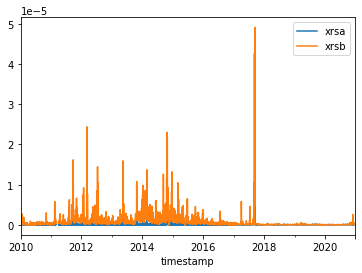

In [7]:
ddf[["xrsa", "xrsb"]].resample("1d").mean().compute().plot()

<AxesSubplot:xlabel='timestamp'>

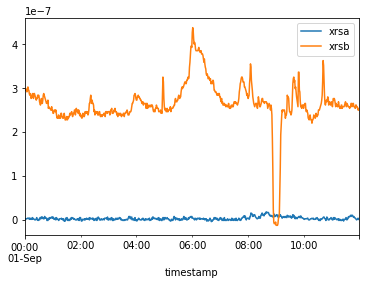

In [8]:
ddf.loc["2013-09-01 00:00":"2013-09-01 11:59"][["xrsa", "xrsb"]].resample("60s").max().compute().plot()

<AxesSubplot:xlabel='timestamp'>

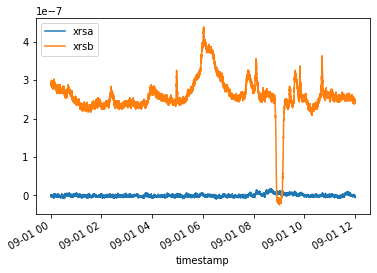

In [9]:
ddf.loc["2013-09-01 00:00":"2013-09-01 11:59"][["xrsa", "xrsb"]].compute().plot()

In [11]:
ddf[["xrsa", "xrsb"]].describe().compute()

,xrsa,xrsb
count,2.237725e+08,2.237725e+08
mean,6.407362e-08,6.181059e-07
std,2.738802e-06,8.388002e-06
min,-2.802494e-06,-8.360518e-06
25%,5.568984e-09,6.076702e-08
50%,1.792570e-08,2.903292e-07
75%,2.009540e-07,1.257054e-06
max,8.136051e-04,3.267578e-03


<AxesSubplot:xlabel='timestamp'>

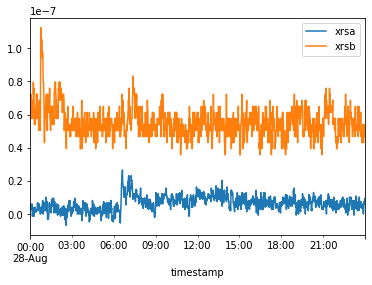

In [13]:
ddf.loc["2010-08-28 00:00":"2010-08-28 23:59:59"][["xrsa", "xrsb"]].resample("60s").max().compute().plot()

In [14]:
ddf.loc["2010-08-28 00:00":"2010-08-28 23:59:59"][["xrsa", "xrsb"]].describe().compute()

,xrsa,xrsb
count,4.218800e+04,4.218800e+04
mean,3.558883e-09,4.706906e-08
std,4.466594e-09,9.197019e-09
min,-1.214768e-08,1.756736e-08
25%,7.788282e-10,4.309327e-08
50%,3.500199e-09,4.673982e-08
75%,6.221569e-09,5.038638e-08
max,2.663185e-08,1.123779e-07
